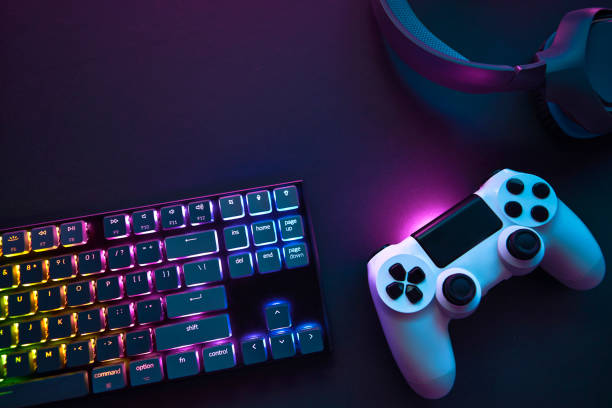

#***VIDEO GAME SALES ANALYSIS & PREDICTION***

In [ ]:
#IMPORTING MODULES:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

Dataset contains video game sales data up to 2016, with the following columns:

•	Name: Name of the video game.

•	Platform: Platform on which the game was released (e.g., PS4, Xbox, PC).

•	Year_of_Release: Year the game was released.

•	Genre: Genre of the game (e.g., Action, Sports, RPG).

•	Publisher: Publisher of the game.

•	NA_Sales: Sales in North America (in millions).

•	EU_Sales: Sales in Europe (in millions).

•	JP_Sales: Sales in Japan (in millions).

•	Other_Sales: Sales in other regions (in millions).

•	Global_Sales: Total global sales (in millions).


In [ ]:
#Loading The Dataset
game=pd.read_csv('videogameSales.csv')

# ***EDA(Exploratory Data Analysis)***

In [ ]:
#Reviewing The First 5 Rows
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#Reviewing The Last 5 Rows
game.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
#Inspecting The Datatypes of the Columns
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
#Checking For The Null Values OR Missing Values
game.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
#Finding the mode of the Year Column
mode_of_year=game['Year'].mode()
mode_of_year

,Year
0,2009.0


In [ ]:
#Filling up the NaN values with the Mode of year
game.fillna(2009, inplace=True)

In [ ]:
#To check that all null values are replaced with the mode
game['Year'].value_counts()

,count
Year,
2009.0,1702
2008.0,1428
2010.0,1259
2007.0,1202
2011.0,1139
2006.0,1008
2005.0,941
2002.0,829
2003.0,775


In [ ]:
#Replacing the missing values of Publisher column with 'UNKNOWN'
game['Publisher'].fillna('UNKNOWN',inplace=True)

# ***ANALYZING THE TRENDS***

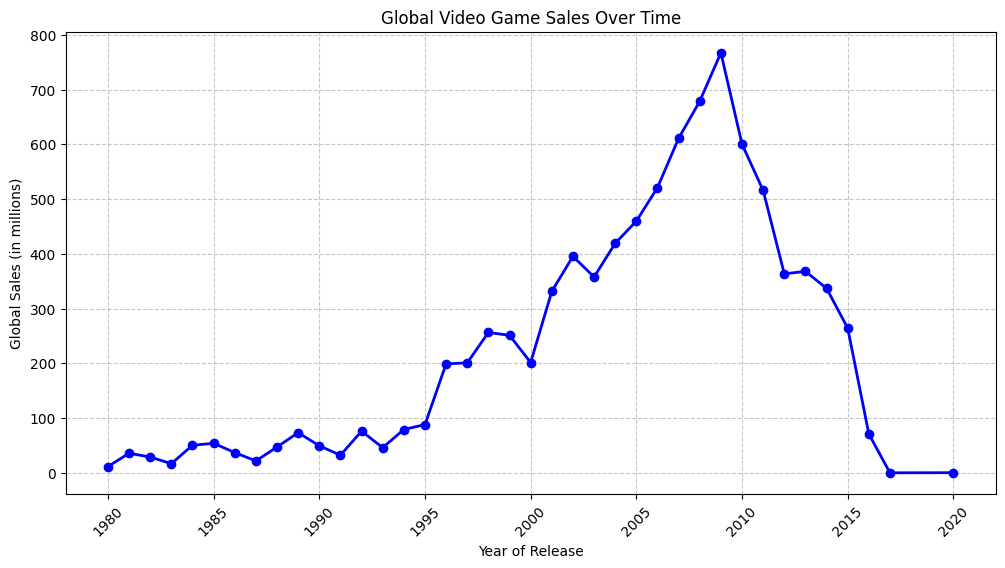

In [ ]:
#Group data by year and calculate total global sales
yearly_sales=game.groupby('Year')['Global_Sales'].sum()
#Group by return a series and year.index indicate year and year.values indicates the global sales
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales.index,yearly_sales.values, marker='o',color='b',linestyle='-',linewidth=2)
plt.grid(True,linestyle='--',alpha=0.7) #for grid
plt.xticks(rotation=45)
plt.title("Global Video Game Sales Over Time")
plt.xlabel("Year of Release")
plt.ylabel("Global Sales (in millions)")
plt.show()

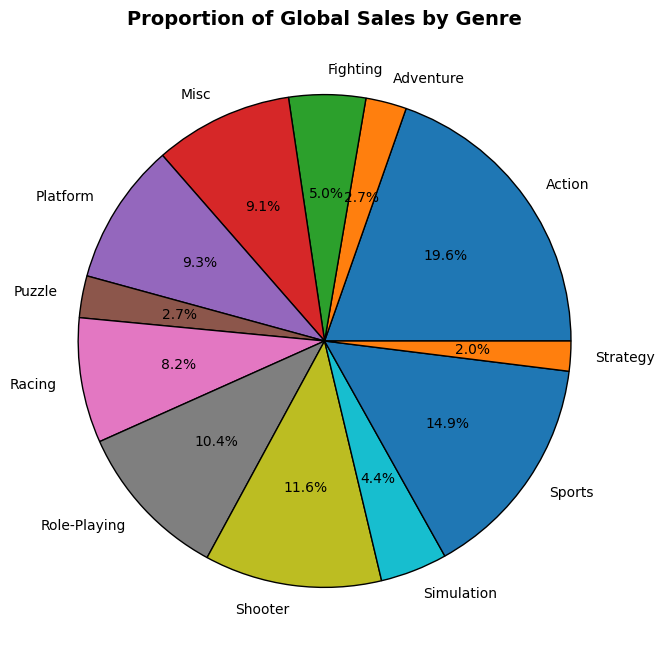

In [ ]:
#calculate total global sales for each genre
genre_sales=game.groupby('Genre')['Global_Sales'].sum()
#Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_sales,labels=genre_sales.index,autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'})
plt.title("Proportion of Global Sales by Genre", fontsize=14, fontweight='bold')
plt.show()

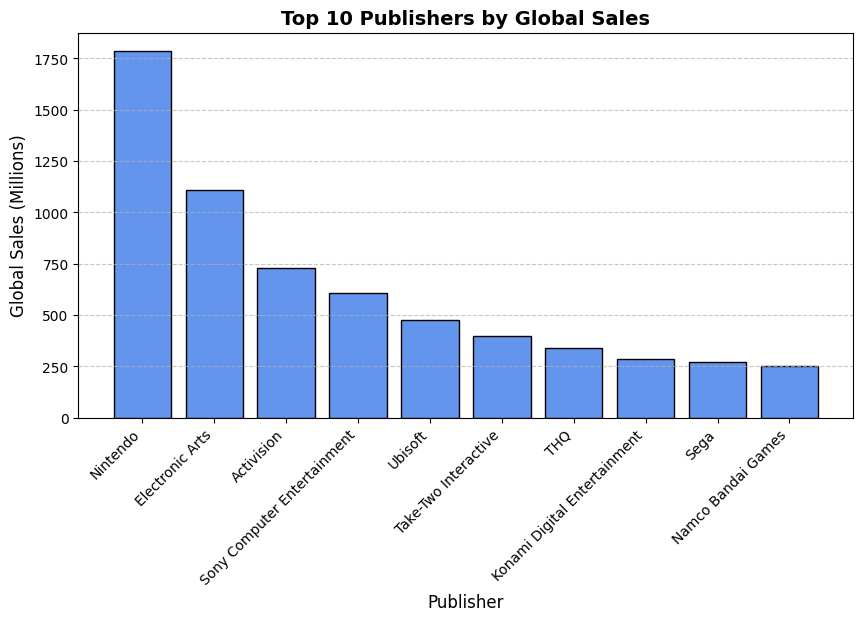

In [ ]:
#Comparing global sales by publisher.(TOP 10)
publisher_sales=game.groupby('Publisher')['Global_Sales'].sum().nlargest(10) #select 10 highest sales publisher
plt.figure(figsize=(10, 5))
plt.bar(publisher_sales.index,publisher_sales.values,color='cornflowerblue',edgecolor='black')
plt.title("Top 10 Publishers by Global Sales",fontsize=14,fontweight='bold')
plt.xlabel("Publisher",fontsize=12)
plt.ylabel("Global Sales (Millions)",fontsize=12)
plt.xticks(rotation=45, ha='right',fontsize=10) #aligns label to right
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

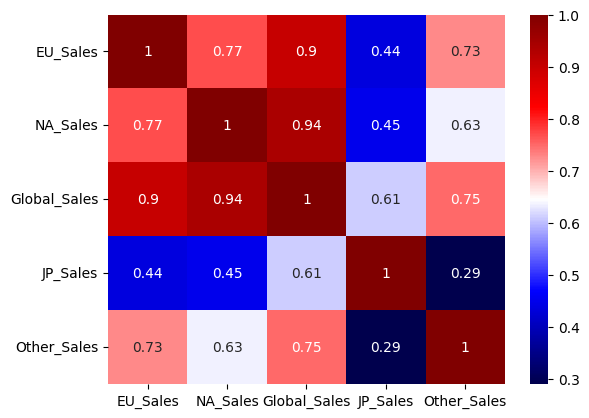

In [ ]:
#Checking For Correaltion
corr_matrix=game[['EU_Sales','NA_Sales','Global_Sales','JP_Sales','Other_Sales']].corr()
sns.heatmap(corr_matrix,annot=True,cmap='seismic')
plt.show()

1.High Correlation with Global Sales

NA_Sales (0.94) and EU_Sales (0.90) are highly correlated with Global_Sales, meaning most global sales come from these regions.
Other_Sales (0.75) also shows a strong correlation with Global_Sales.

2.Weaker Correlation for JP_Sales

JP_Sales has a lower correlation (0.61) with Global_Sales, indicating Japan's sales trend is different from other regions.
It has the weakest correlation with Other_Sales (0.29), meaning Japan's sales patterns differ significantly from other regions.

3.Correlation Between Regions

NA_Sales and EU_Sales are strongly correlated (0.77), meaning sales in North America and Europe follow similar trends.
Other_Sales is more correlated with EU_Sales (0.73) than NA_Sales (0.63).

# ***HANDLING  OUTLIERS***

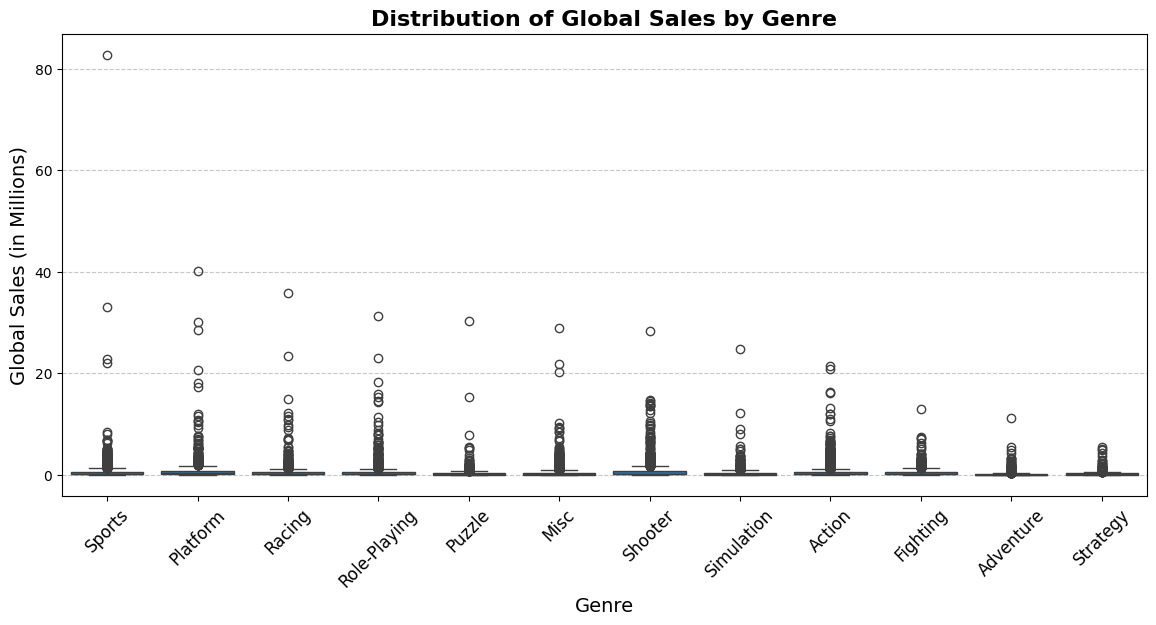

In [ ]:
#Identifying the outliers
plt.figure(figsize=(14,6))
sns.boxplot(data=game,x='Genre',y='Global_Sales')
plt.title("Distribution of Global Sales by Genre", fontsize=16, fontweight='bold')
plt.xlabel("Genre",fontsize=14)
plt.ylabel("Global Sales (in Millions)",fontsize=14)
plt.xticks(rotation=45, fontsize=12)#To rotate the ticks
plt.grid(axis='y',linestyle='--',alpha=0.7)#Grid for only y axis
plt.show()

In [ ]:
#Applying the condition to find the outliers
game[(game['Genre']=="Sports")&(game['Global_Sales']>60)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [ ]:
#deleting the outlier
game.drop(0,inplace=True)

In [ ]:
game[(game['Genre']=="Platform")&(game['Global_Sales']>40)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [ ]:
game.drop(1,inplace=True)

# ***FEATURE ENGINEERING***

In [ ]:
#Feature Engineering
#Platform_popularity shows that the no.of occurence of the platform
#to_dict is used to converts the output into dictionary

platform_popularity=game['Platform'].value_counts().to_dict()
game['Platform_Popularity']=game['Platform'].map(platform_popularity)

In [ ]:
#To check wheather the columns is created
game.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Popularity
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1324
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1324
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,98
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,98
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2163
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,1324
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,1324
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,97
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,2163
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,2163


In [ ]:
#Calculate the average global sales for each genre and map it back to the dataset.
genre_avg_sales=game.groupby('Genre')['Global_Sales'].mean().to_dict()
game['Genre_Avg_Sales']=game['Genre'].map(genre_avg_sales)

In [ ]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Popularity,Genre_Avg_Sales
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1324,0.586101
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1324,0.532277
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,98,0.623233
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,98,0.420876
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2163,0.893932


# ***MODEL BUILDING***

***Linear Regression***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score #to evaluate the model

#Feature Selection
x=game[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year']]
y=game.iloc[:,-3]

#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # dividing the data into 80% 20% using test size
#and random is used to shuffle the data

#initilizing the algorithm
model_1=LinearRegression()
model_1.fit(x_train,y_train)

#prediction
y_pred=model_1.predict(x_test) #testing the x test
y_pred

#evaluating the model
mse=mean_squared_error(y_test,y_pred) #mse is used to check the error rate
r2=r2_score(y_test,y_pred) #R2 score is used to check accuracy
print(f"R2 Score :{r2:.6f}")
rmse=np.sqrt(mse)
print(f"RMSE :{rmse:.6f}")
print(f"MSE : {mse:.6f}")

R2 Score :0.999988
RMSE :0.005228
MSE : 0.000027


***Lasso (L1) Regression***






In [ ]:
from sklearn.linear_model import Lasso

#applying Lasso Regression
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

#predictions
y_pred=lasso.predict(x_test)
y_pred

#Evaluating Model
r2=r2_score(y_test, y_pred)
print("R2 Score (Lasso) Is:",r2)
mse=mean_squared_error(y_test, y_pred)
print("MSE (Lasso) Is:",mse)
rmse=np.sqrt(mse)
print("RMSE (Lasso) Is:",rmse)

R2 Score (Lasso) Is: 0.9457407816237876
MSE (Lasso) Is: 0.1277662262851398
RMSE (Lasso) Is: 0.35744401839328604


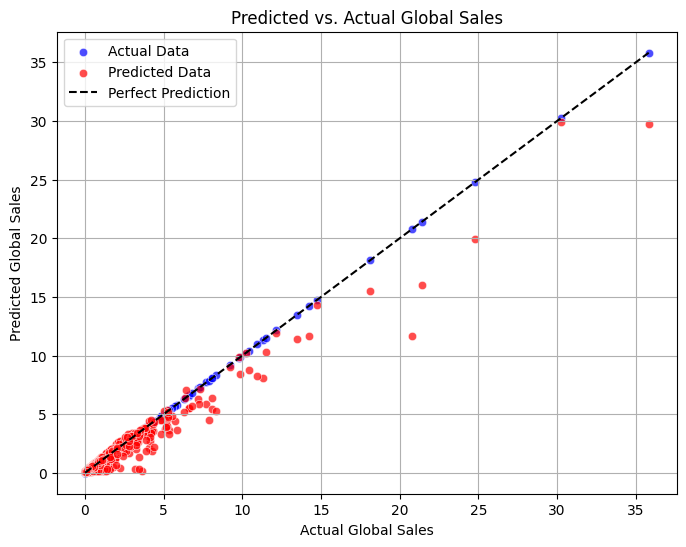

In [ ]:
plt.figure(figsize=(8, 6))

#plot actual values in blue
sns.scatterplot(x=y_test,y=y_test,color="blue",label="Actual Data",alpha=0.7)

#plot predicted values in red
sns.scatterplot(x=y_test,y=y_pred,color="red",label="Predicted Data",alpha=0.7)

#plot the perfect prediction reference line
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],linestyle="--",color="black",label="Perfect Prediction")

#labels and title
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Predicted vs. Actual Global Sales")
plt.legend()
plt.grid(True)

plt.show()

### ***Decision Tree Regressor***

In [ ]:
#Importing the modules:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#intialzing the algorithm
model_3=DecisionTreeRegressor(max_depth=5,random_state=42)
model_3.fit(x_train,y_train)

#predictions
y_pred=model_3.predict(x_test)
y_pred

#performance evaluation
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

#Final Metrics
print("Mean Squared Error Is:",mse)
print("R2 Score Is:",r2)


Mean Squared Error Is: 0.17065136398294806
R2 Score Is: 0.927528503472547


### ***XGBoost model***

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#selecting features and target
x=game[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Genre_Avg_Sales','Year']]
y=game['Global_Sales']

#splitting data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.2,random_state=42)

#intilizing the algorithm
model_4=xgb.XGBRegressor(objective='reg:squarederror',n_estimators=100,learning_rate=0.1,max_depth=4,reg_alpha=0.2,reg_lambda=0.2)
model_4.fit(x_train,y_train)#training the model

#predictions
y_pred=model_4.predict(x_test)
y_pred

#model evaluation
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

#final metrics
print("Mean Squared Error Is:",mse)
print("R2 Score Is:",r2)

Mean Squared Error Is: 0.10756733039613393
R2 Score Is: 0.9543187629484768


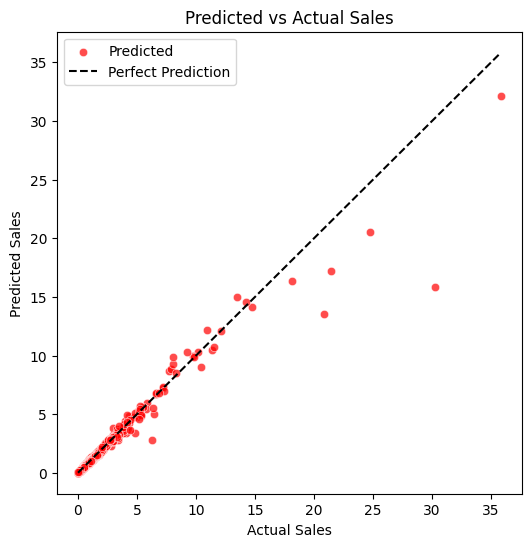

In [ ]:
#Visualization for actual and predicted values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test,y=y_pred,color="red",alpha=0.7,label="Predicted")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], "--", color="black", label="Perfect Prediction")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted vs Actual Sales")
plt.legend()
plt.show()

# ***THANK YOU***